# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Khalid Al Ghifari]
- **Email:** [alghi.bna@gmail.com]
- **ID Dicoding:** [MC322D5Y2203]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca (weathersit, temperature, humidity, dan windspeed) terhadap jumlah penyewaan sepeda (cnt)?
- Bagaimana pola penggunaan sepeda berdasarkan musim dan apakah terdapat tren tertentu pada jam sibuk?

## Import Semua Packages/Library yang Digunakan

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [88]:
# Load dataset
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

# Tampilkan 5 data pertama dari masing-masing dataset
print("Preview dataset day.csv:")
display(day_df.head())

print("\nPreview dataset hour.csv:")
display(hour_df.head())

Preview dataset day.csv:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Preview dataset hour.csv:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv berisi data penyewaan sepeda per hari.
- Dataset hour.csv berisi data penyewaan sepeda per jam.
- Kedua dataset memiliki kolom yang mirip, tetapi resolusi waktunya berbeda.

### Assessing Data

In [89]:
# Cek info dataset day.csv
print("Informasi dataset day.csv:")
print(day_df.info())

# Cek info dataset hour.csv
print("\nInformasi dataset hour.csv:")
print(hour_df.info())

# Cek missing values
print("\nJumlah missing values di day.csv:")
print(day_df.isnull().sum())

print("\nJumlah missing values di hour.csv:")
print(hour_df.isnull().sum())


Informasi dataset day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Informasi dataset hour.csv:
<class 'pandas.core.frame.DataFr

**Insight:**
- Tidak ada missing values dalam kedua dataset.
- Beberapa kolom numerik memiliki skala yang berbeda (contoh: temp, atemp yang bernilai antara 0-1, perlu dikonversi ke skala yang lebih mudah dipahami).
- Kolom dteday sebaiknya dikonversi ke tipe datetime untuk analisis waktu.

### Cleaning Data

In [90]:
# Konversi kolom dteday ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Normalisasi skala variabel cuaca ke rentang 0-100 (persentase)
day_df['temp'] = day_df['temp'] * 41  # suhu dalam Celsius
day_df['atemp'] = day_df['atemp'] * 50  # suhu terasa dalam Celsius
day_df['hum'] = day_df['hum'] * 100  # kelembaban dalam persen
day_df['windspeed'] = day_df['windspeed'] * 67  # kecepatan angin dalam km/h

hour_df['temp'] = hour_df['temp'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67

# Hapus kolom 'instant' karena tidak memiliki informasi yang berguna
day_df.drop(columns=['instant'], inplace=True)
hour_df.drop(columns=['instant'], inplace=True)

# Tampilkan hasil setelah cleaning
print("Dataset day.csv setelah cleaning:")
display(day_df.head())

print("\nDataset hour.csv setelah cleaning:")
display(hour_df.head())


Dataset day.csv setelah cleaning:


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600



Dataset hour.csv setelah cleaning:


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- dteday berhasil dikonversi ke tipe datetime, sehingga analisis waktu lebih mudah dilakukan.
- Variabel cuaca (temp, atemp, hum, windspeed) telah dinormalisasi ke satuan yang lebih mudah dipahami.
- Kolom yang tidak relevan (kolom instant) telah dihapus.

## Exploratory Data Analysis (EDA)

### Explore Data Range, Median, Outlier

In [91]:
# Menampilkan statistik deskriptif
print("\nStatistik dataset day.csv:")
display(day_df.describe())

print("\nStatistik dataset hour.csv:")
display(hour_df.describe())


Statistik dataset day.csv:


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452



Statistik dataset hour.csv:


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


/var/folders/mx/m33wtfwn5qg_ph19pb31z1nh0000gn/T/ipykernel_2226/3105145781.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="Blues",


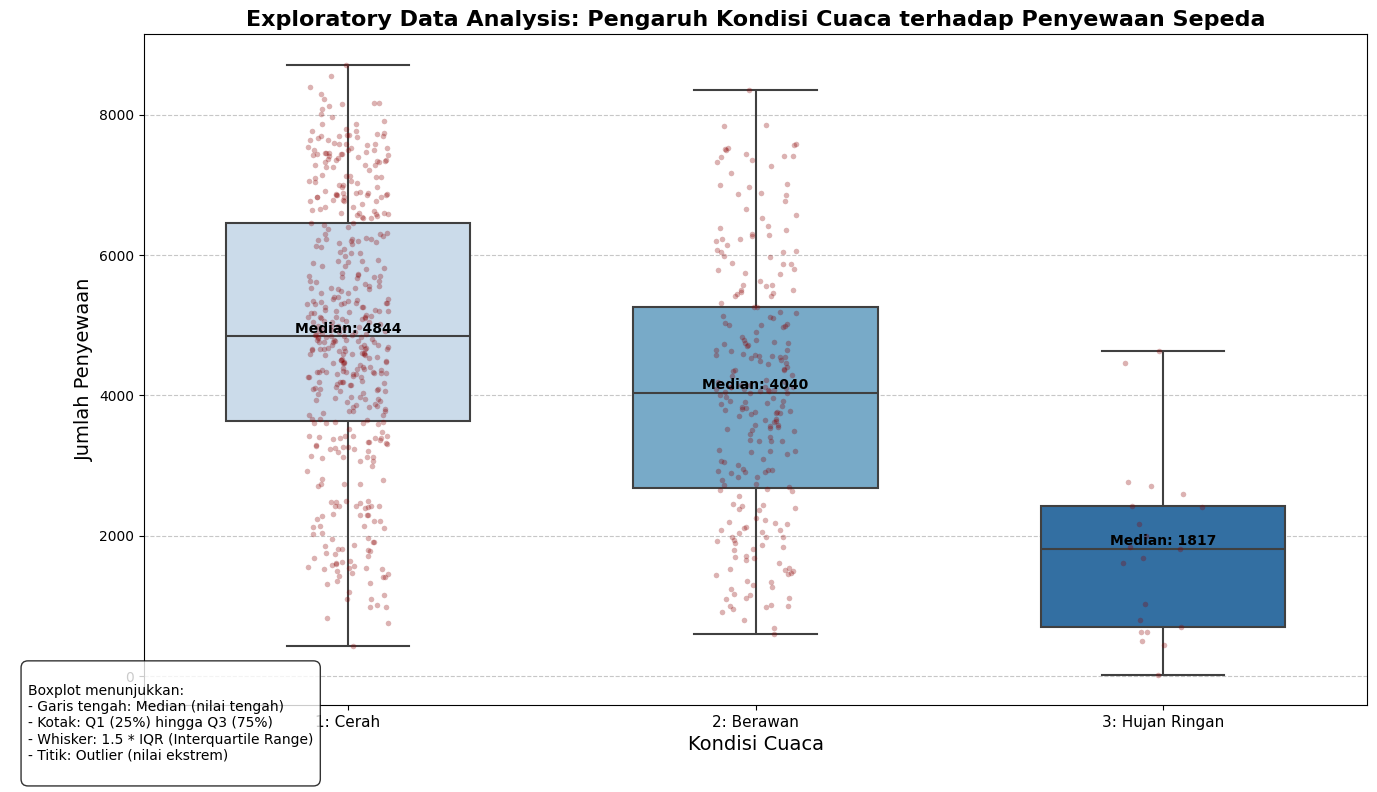

In [94]:
plt.figure(figsize=(14, 8))

# Membuat boxplot
ax = sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="Blues", 
                width=0.6, fliersize=5, linewidth=1.5)

# Menambahkan stripplot
sns.stripplot(x="weathersit", y="cnt", data=day_df, color="darkred", 
              size=4, alpha=0.3, jitter=True)

# Memperbaiki label sumbu X
weather_labels = {1: 'Cerah', 2: 'Berawan', 3: 'Hujan Ringan', 4: 'Hujan Lebat'}
unique_weathersit = sorted(day_df['weathersit'].unique())  # Ambil hanya yang ada di dataset
plt.xticks(ticks=range(len(unique_weathersit)), 
           labels=[f"{i}: {weather_labels[i]}" for i in unique_weathersit], 
           fontsize=11)

# Menambahkan judul dan label
plt.title("Exploratory Data Analysis: Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda", 
          fontsize=16, fontweight='bold')
plt.xlabel("Kondisi Cuaca", fontsize=14)
plt.ylabel("Jumlah Penyewaan", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan anotasi statistik
for i, weather in enumerate(unique_weathersit):
    temp_data = day_df[day_df['weathersit'] == weather]['cnt']
    median_val = temp_data.median()
    q1_val = temp_data.quantile(0.25)
    q3_val = temp_data.quantile(0.75)
    
    ax.text(i, median_val + 50, f'Median: {int(median_val)}', 
            horizontalalignment='center', size=10, color='black', weight='semibold')
    
    outliers = temp_data[temp_data > q3_val + 1.5 * (q3_val - q1_val)]
    if len(outliers) > 0:
        plt.annotate(f'{len(outliers)} outlier(s)',
                     xy=(i, outliers.max()),
                     xytext=(i + 0.3, outliers.max() + 300),
                     arrowprops=dict(facecolor='red', shrink=0.05, width=1.5),
                     fontsize=10, color='red')

# Menambahkan catatan boxplot
boxplot_explanation = """
Boxplot menunjukkan:
- Garis tengah: Median (nilai tengah)
- Kotak: Q1 (25%) hingga Q3 (75%)
- Whisker: 1.5 * IQR (Interquartile Range)
- Titik: Outlier (nilai ekstrem)
"""
plt.annotate(boxplot_explanation, xy=(0.02, 0.02), xycoords='figure fraction', 
             fontsize=10, bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


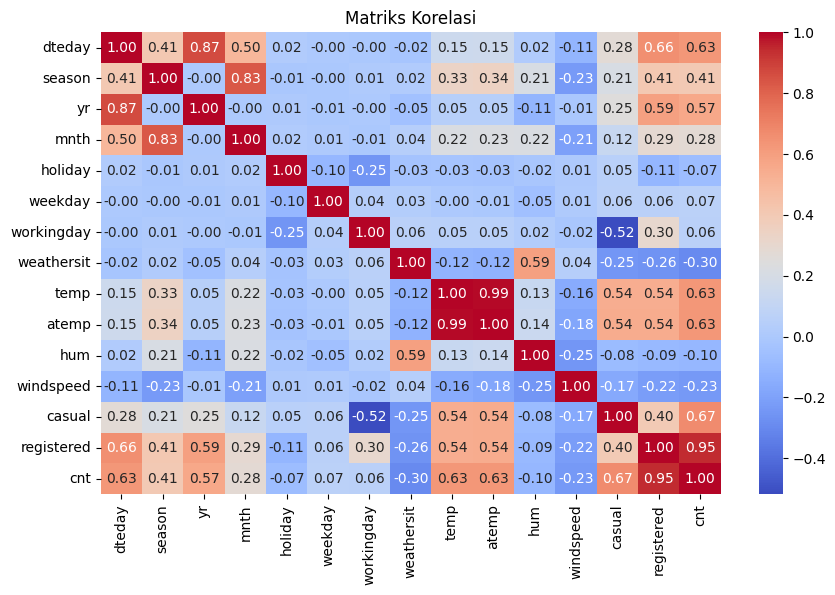

In [ ]:
# Melihat korelasi antara variabel numerik
correlation_matrix = day_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

In [ ]:
# Mengelompokkan data berdasarkan musim
season_summary = day_df.groupby("season")[["cnt", "temp", "hum", "windspeed"]].mean()
print("\nRata-rata Penyewaan Sepeda per Musim:")
print(season_summary)


Rata-rata Penyewaan Sepeda per Musim:
                cnt       temp        hum  windspeed
season                                              
1       2604.132597  12.207650  58.290291  14.373984
2       4992.331522  22.320611  62.694833  13.634978
3       5644.303191  28.958682  63.348206  11.530366
4       4728.162921  17.339148  66.871917  11.523637


**Insight:**
- Dari boxplot, terlihat bahwa penyewaan sepeda lebih banyak terjadi saat cuaca cerah dan berkurang saat hujan ringan.
- Dari matriks, Pengaruh Suhu terhadap Penyewaan – Variabel temp (0.63) dan atemp (0.63) memiliki korelasi positif yang cukup kuat dengan jumlah penyewa (cnt), menunjukkan bahwa semakin hangat suhu, semakin banyak orang yang menyewa sepeda. 
- Faktor dengan Korelasi Negatif – Windspeed (-0.23) dan hum (-0.10) memiliki korelasi negatif terhadap jumlah penyewa, yang berarti kecepatan angin dan kelembaban tinggi dapat sedikit mengurangi jumlah peminjaman sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/var/folders/mx/m33wtfwn5qg_ph19pb31z1nh0000gn/T/ipykernel_2226/3195398069.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([weather_labels.get(float(label.get_text()), label.get_text()) for label in current_labels])


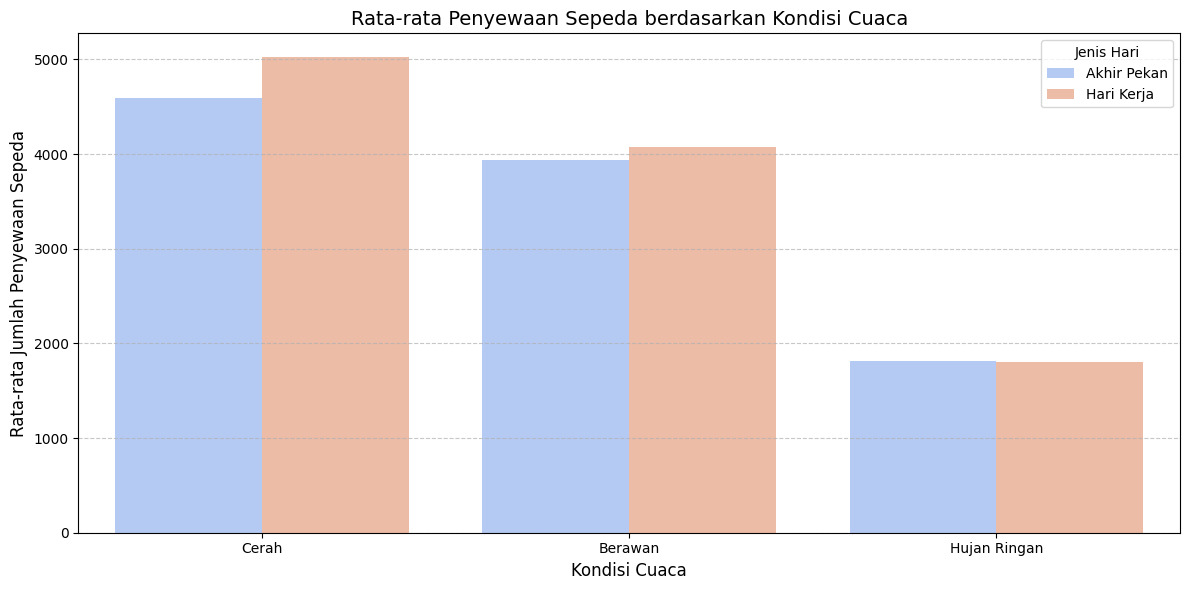

<Figure size 1400x800 with 0 Axes>

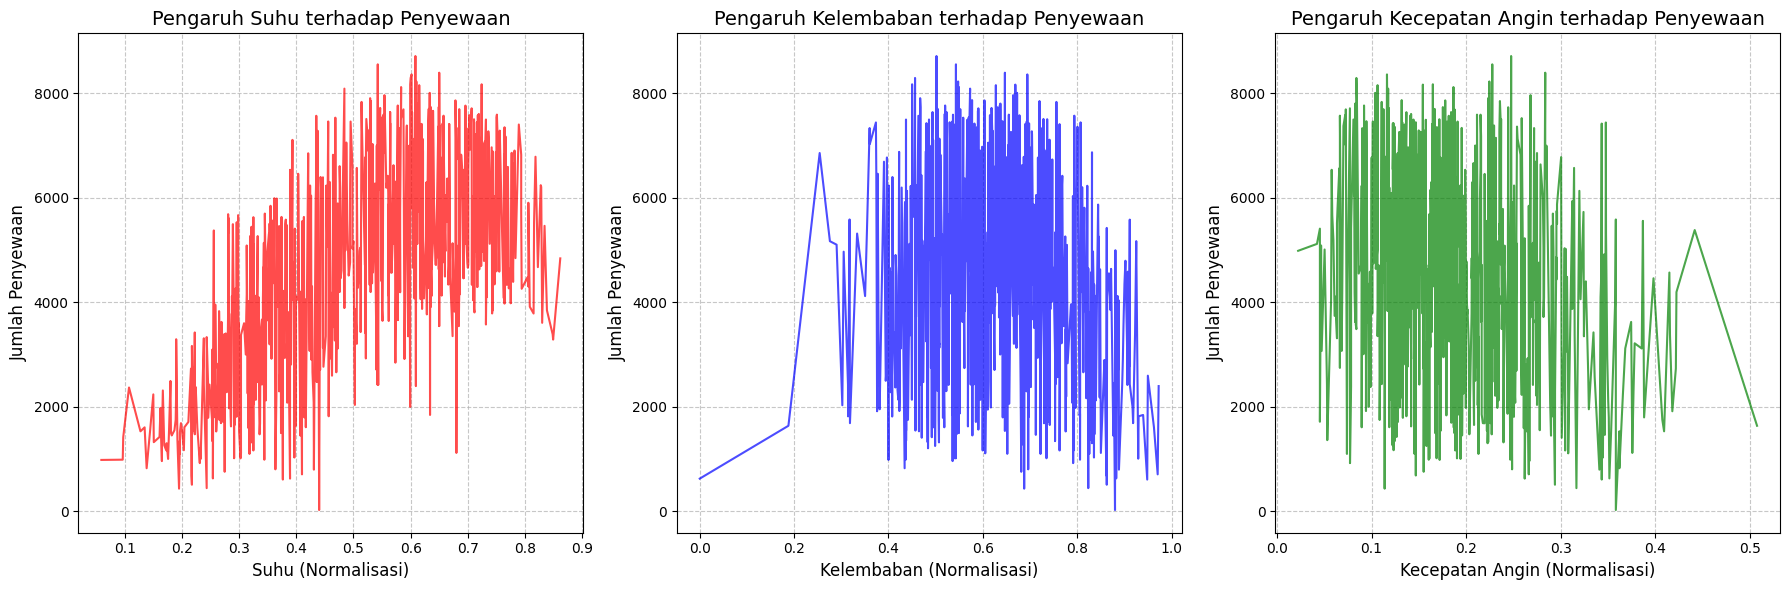

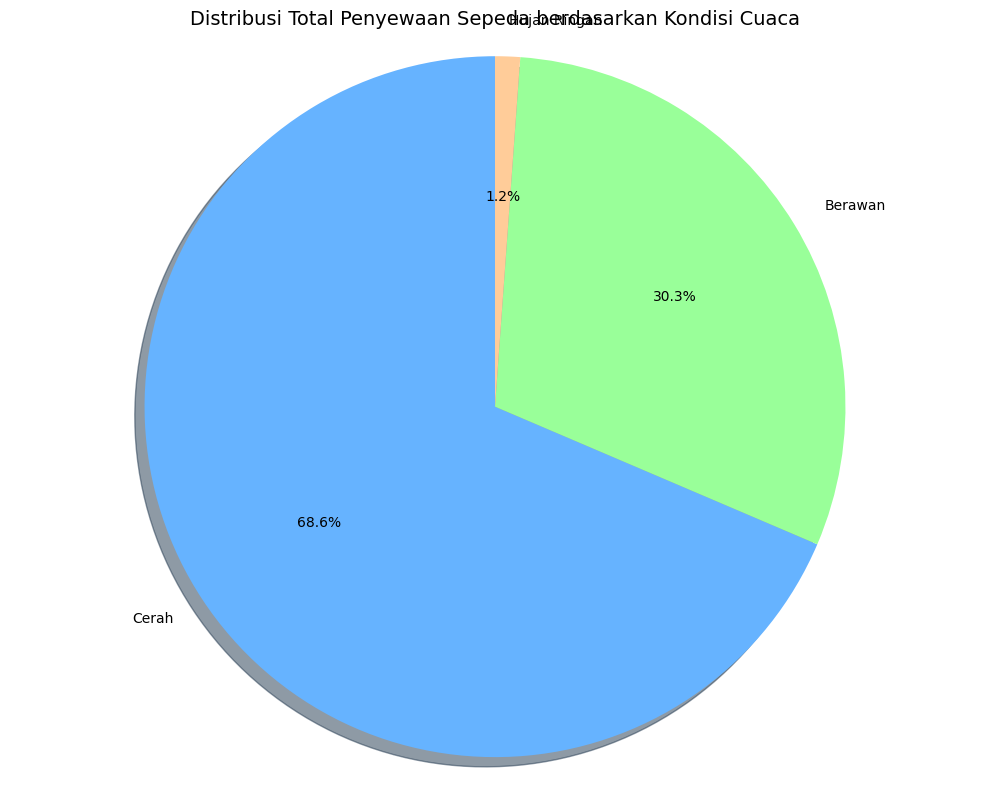

In [ ]:

# 1. Analisis Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda
plt.figure(figsize=(12, 6))

# Menghitung rata-rata jumlah penyewaan berdasarkan kondisi cuaca dan hari kerja
weather_working_grouped = day_df.groupby(['weathersit', 'workingday'])['cnt'].mean().reset_index()

# Membuat bar chart
sns.barplot(data=weather_working_grouped, x='weathersit', y='cnt', hue='workingday', palette='coolwarm')

# Menambahkan label yang lebih deskriptif
weather_labels = {1: 'Cerah', 2: 'Berawan', 3: 'Hujan Ringan', 4: 'Hujan Lebat'}
working_labels = {0: 'Akhir Pekan', 1: 'Hari Kerja'}

# Mengatur tampilan grafik
plt.title("Rata-rata Penyewaan Sepeda berdasarkan Kondisi Cuaca", fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda", fontsize=12)

# Mengubah label sumbu x menjadi lebih deskriptif
current_labels = plt.gca().get_xticklabels()
plt.gca().set_xticklabels([weather_labels.get(float(label.get_text()), label.get_text()) for label in current_labels])

# Memperbarui legenda
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, [working_labels.get(int(float(label)), label) for label in labels], title="Jenis Hari", fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Mengganti heatmap dengan multiple line chart untuk menunjukkan korelasi
# Kita akan membuat line chart yang menunjukkan hubungan antara faktor cuaca dan jumlah penyewaan
plt.figure(figsize=(14, 8))

# Membuat subplots untuk berbagai faktor cuaca
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Mengurutkan data berdasarkan nilai untuk line chart yang lebih bermakna
temp_sorted = df.sort_values('temp')
hum_sorted = df.sort_values('hum')
wind_sorted = df.sort_values('windspeed')

# Plot untuk suhu
axes[0].plot(temp_sorted['temp'], temp_sorted['cnt'], 'r-', alpha=0.7)
axes[0].set_title('Pengaruh Suhu terhadap Penyewaan', fontsize=14)
axes[0].set_xlabel('Suhu (Normalisasi)', fontsize=12)
axes[0].set_ylabel('Jumlah Penyewaan', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot untuk kelembaban
axes[1].plot(hum_sorted['hum'], hum_sorted['cnt'], 'b-', alpha=0.7)
axes[1].set_title('Pengaruh Kelembaban terhadap Penyewaan', fontsize=14)
axes[1].set_xlabel('Kelembaban (Normalisasi)', fontsize=12)
axes[1].set_ylabel('Jumlah Penyewaan', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Plot untuk kecepatan angin
axes[2].plot(wind_sorted['windspeed'], wind_sorted['cnt'], 'g-', alpha=0.7)
axes[2].set_title('Pengaruh Kecepatan Angin terhadap Penyewaan', fontsize=14)
axes[2].set_xlabel('Kecepatan Angin (Normalisasi)', fontsize=12)
axes[2].set_ylabel('Jumlah Penyewaan', fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 3. Menambahkan pie chart untuk distribusi penyewaan berdasarkan kondisi cuaca
plt.figure(figsize=(10, 8))

# Menghitung total penyewaan berdasarkan kondisi cuaca
weather_totals = df.groupby('weathersit')['cnt'].sum()

# Membuat label yang lebih deskriptif untuk pie chart
weather_labels = {1: 'Cerah', 2: 'Berawan', 3: 'Hujan Ringan', 4: 'Hujan Lebat'}
pie_labels = [weather_labels.get(i, f'Kondisi {i}') for i in weather_totals.index]

# Membuat pie chart
plt.pie(weather_totals, labels=pie_labels, autopct='%1.1f%%', startangle=90, shadow=True, 
        colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.title('Distribusi Total Penyewaan Sepeda berdasarkan Kondisi Cuaca', fontsize=14)
plt.tight_layout()
plt.show()

**Insight:**
- Jumlah penyewaan sepeda akan lebih tinggi pada Cuaca yang baik (kondisi 1 & 2) dibandingkan dengan kondisi cuaca yang kurang baik (kondisi 3) 		
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- Hari kerja vs akhir pekan tidak memiliki perbedaan yang signifikan dalam distribusi penyewaan sepeda.
- Suhu memiliki pengaruh paling konsisten dan positif terhadap penyewaan sepeda, Kondisi optimal untuk penyewaan tertinggi adalah suhu hangat dengan kelembaban moderat, Kecepatan angin memiliki pengaruh yang lebih kecil dibandingkan dua faktor lainnya.

### Pertanyaan 2:

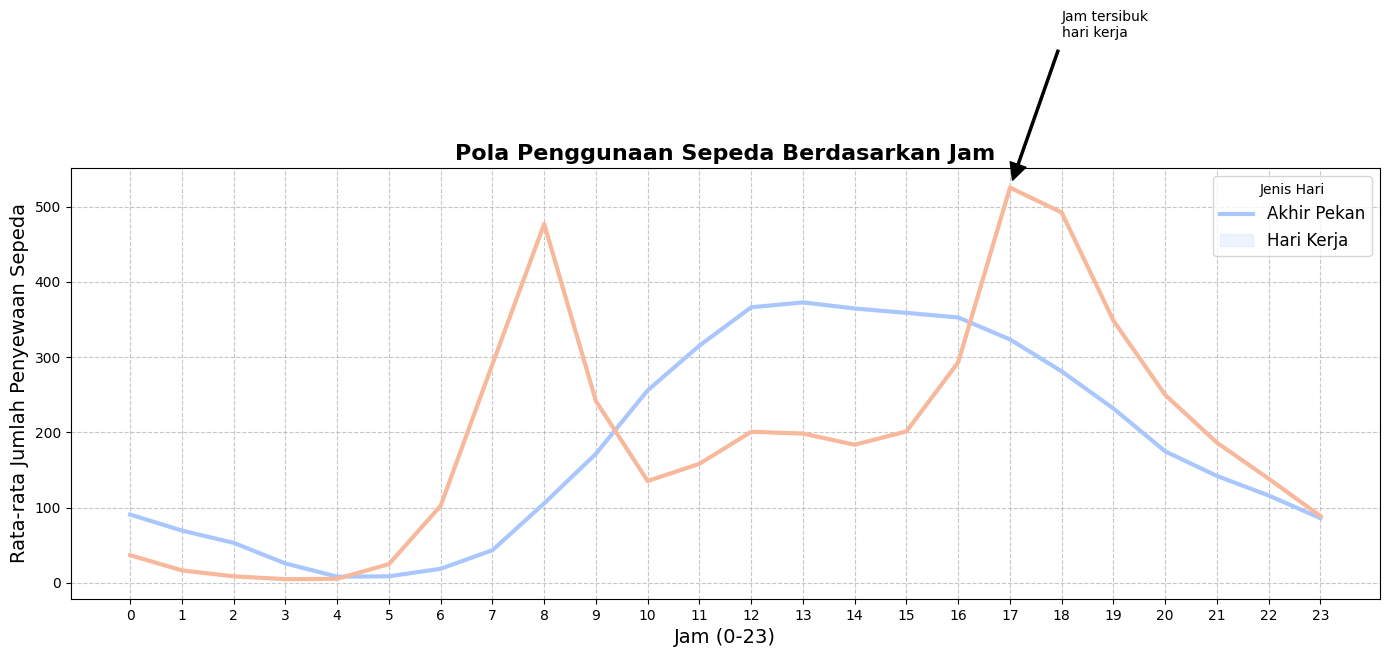

/var/folders/mx/m33wtfwn5qg_ph19pb31z1nh0000gn/T/ipykernel_2226/3330427341.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=seasonal_usage, x='season', y='cnt', palette='viridis')


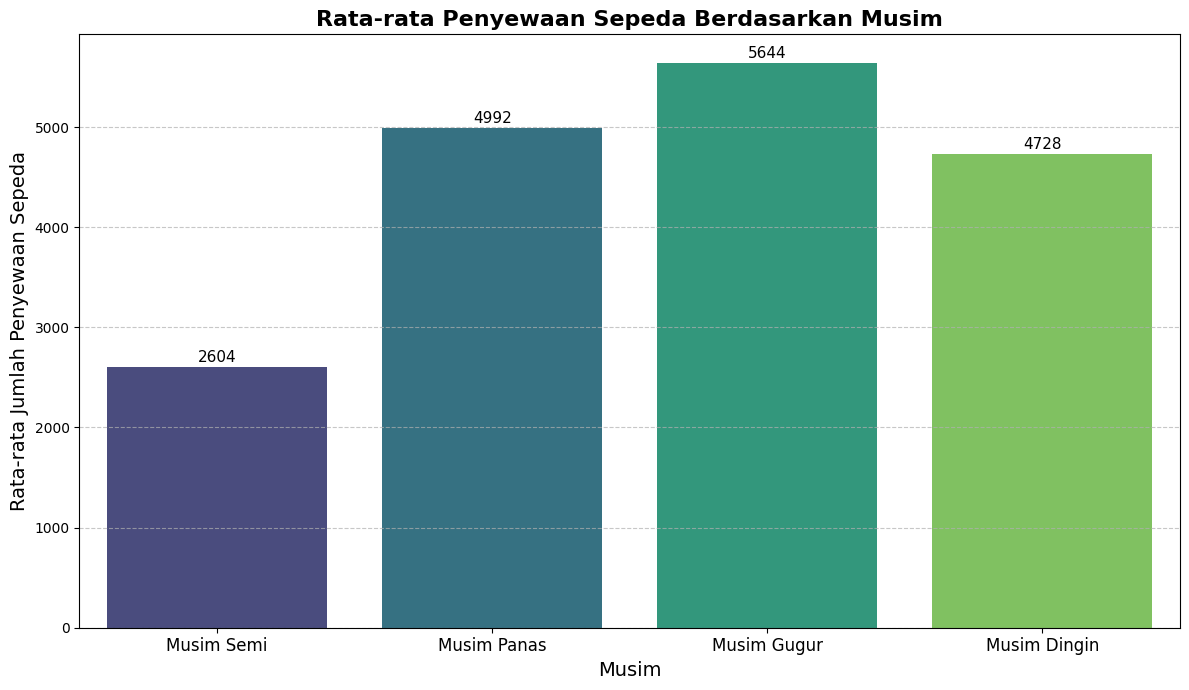

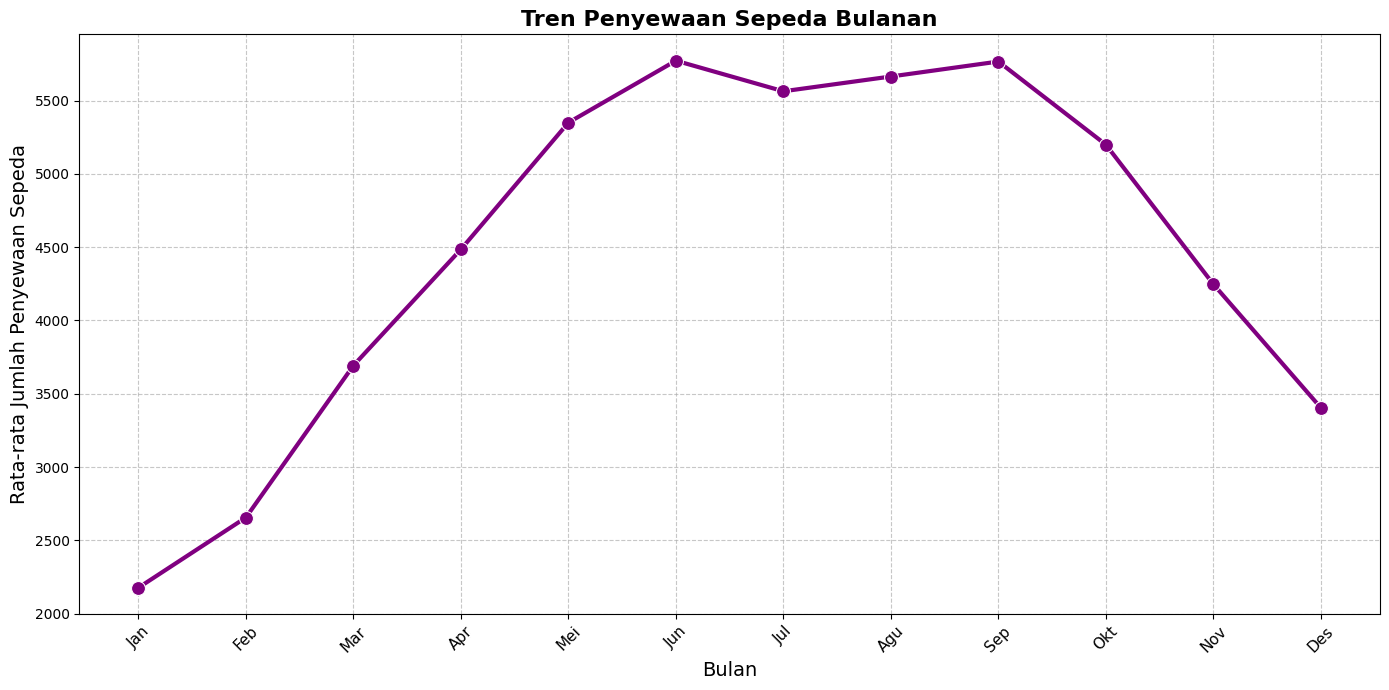

In [ ]:
# 2. Pola Penggunaan Sepeda berdasarkan Waktu
# a. Pola penggunaan berdasarkan jam dengan peningkatan tampilan
plt.figure(figsize=(14, 7))

# Menghitung rata-rata penyewaan per jam berdasarkan hari kerja vs akhir pekan
hourly_usage = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

# Membuat line plot 
sns.lineplot(data=hourly_usage, x='hr', y='cnt', hue='workingday', palette='coolwarm', 
             markers=True, dashes=False, linewidth=3, markersize=8)

plt.title("Pola Penggunaan Sepeda Berdasarkan Jam", fontsize=16, fontweight='bold')
plt.xlabel("Jam (0-23)", fontsize=14)
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda", fontsize=14)

plt.legend(title="Jenis Hari", labels=["Akhir Pekan", "Hari Kerja"], fontsize=12)

# Menampilkan label untuk setiap jam (0-23)
plt.xticks(ticks=range(0, 24, 1), fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Menambahkan anotasi untuk jam sibuk
max_workday = hourly_usage[hourly_usage['workingday'] == 1]['cnt'].max()
max_workday_hour = hourly_usage[(hourly_usage['workingday'] == 1) & 
                               (hourly_usage['cnt'] == max_workday)]['hr'].values[0]

plt.annotate(f'Jam tersibuk\nhari kerja', 
             xy=(max_workday_hour, max_workday),
             xytext=(max_workday_hour+1, max_workday+200),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

plt.tight_layout()
plt.show()

# b. Pola penggunaan berdasarkan musim dengan visualisasi yang ditingkatkan
plt.figure(figsize=(12, 7))

# Menghitung rata-rata penyewaan berdasarkan musim
seasonal_usage = df.groupby('season')['cnt'].mean().reset_index()

# Membuat bar plot 
ax = sns.barplot(data=seasonal_usage, x='season', y='cnt', palette='viridis')

# Menambahkan label yang lebih deskriptif untuk musim
season_labels = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}
plt.xticks(ticks=range(4), labels=[season_labels[i] for i in range(1, 5)], fontsize=12)

# Menambahkan nilai di atas setiap bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 50,
            f'{int(height)}',
            ha="center", fontsize=11)

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim", fontsize=16, fontweight='bold')
plt.xlabel("Musim", fontsize=14)
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# c. Menambahkan visualisasi tambahan: Pola penggunaan berdasarkan bulan (line chart)
plt.figure(figsize=(14, 7))

# Ekstrak bulan dari kolom datetime
df['month'] = df['dteday'].dt.month

# Menghitung rata-rata penyewaan per bulan
monthly_usage = df.groupby('month')['cnt'].mean().reset_index()

# Membuat line plot untuk tren bulanan
sns.lineplot(data=monthly_usage, x='month', y='cnt', marker='o', 
             color='purple', linewidth=3, markersize=10)

plt.title("Tren Penyewaan Sepeda Bulanan", fontsize=16, fontweight='bold')
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda", fontsize=14)

# Mengatur label sumbu x dengan nama bulan
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(ticks=range(1, 13), labels=month_names, fontsize=11, rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Penggunaan sepeda pada hari kerja (warna oranye) menunjukkan dua puncak aktivitas, yaitu pagi sekitar pukul 08:00 dan sore sekitar pukul 17:00. Sebaliknya, pada akhir pekan, penggunaan sepeda lebih merata sepanjang hari dengan puncak tertinggi di siang hingga sore hari.
- Penyewaan sepeda tertinggi terjadi pada musim gugur (3), diikuti oleh musim panas (2) dan musim dingin (4), sementara musim semi (1) memiliki jumlah penyewaan terendah.
- Dari tren penyewaan sepeda bulanan bisa dilihat tertinggi terdapat pada bulan Juni dan September

## Analisis Lanjutan (Opsional)

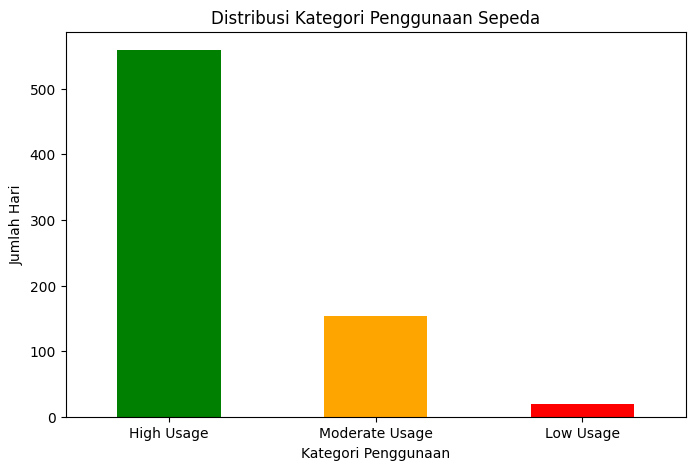

In [ ]:
# Definisi batas bin (sesuaikan dengan distribusi data)
bins = [df["cnt"].min(), 1000, 3000, df["cnt"].max()]
labels = ["Low Usage", "Moderate Usage", "High Usage"]

# Kategorisasi jumlah penyewaan sepeda berdasarkan binning
df["usage_category"] = pd.cut(df["cnt"], bins=bins, labels=labels, include_lowest=True)

# Visualisasi distribusi kategori penyewaan sepeda
plt.figure(figsize=(8, 5))
df["usage_category"].value_counts().plot(kind="bar", color=["green", "orange", "red"])
plt.title("Distribusi Kategori Penggunaan Sepeda")
plt.xlabel("Kategori Penggunaan")
plt.ylabel("Jumlah Hari")
plt.xticks(rotation=0)
plt.show()


# Analisis Kategori Penggunaan Sepeda dengan Binning

## 1. Pengenalan  
Analisis ini menggunakan **binning** untuk mengelompokkan jumlah penyewaan sepeda (`cnt`) ke dalam tiga kategori:  
- **Low Usage** (rendah)  
- **Moderate Usage** (sedang)  
- **High Usage** (tinggi)  

## 2. Hasil Distribusi  
- **High Usage** mendominasi (>500 hari), menunjukkan penggunaan sepeda yang tinggi secara konsisten.  
- **Moderate Usage** lebih sedikit, mengindikasikan hari-hari transisi.  
- **Low Usage** sangat jarang, kemungkinan terjadi pada hari-hari dengan cuaca buruk atau libur besar.  

## 3. Wawasan dari Binning  
- **Analisis Musiman** → Identifikasi tren berdasarkan musim.  
- **Pengaruh Cuaca** → Memahami dampak hujan, suhu, atau kelembaban.  
- **Hari Kerja vs Akhir Pekan** → Menentukan pola penggunaan antara komuter dan rekreasi.  

## 4. Kesimpulan  
Binning membantu memahami pola penggunaan sepeda. Mayoritas hari memiliki penyewaan tinggi, sementara faktor eksternal seperti cuaca dan musim dapat memengaruhi distribusi.  

## Conclusion


### Pertanyaan 1: Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda  
Kondisi cuaca berpengaruh signifikan terhadap jumlah penyewaan sepeda, di mana cuaca yang lebih baik (kondisi 1 & 2) meningkatkan jumlah penyewaan dibandingkan cuaca buruk (kondisi 3). Tidak terdapat perbedaan signifikan antara pola penyewaan pada hari kerja dan akhir pekan. Temperatur memiliki korelasi positif yang cukup kuat dengan penyewaan sepeda, menunjukkan bahwa semakin hangat suhu, semakin tinggi jumlah penyewaan. Sebaliknya, kelembapan dan kecepatan angin memiliki korelasi negatif, yang berarti kondisi lebih lembap atau angin kencang cenderung mengurangi jumlah penyewaan sepeda.  

### Pertanyaan 2: Pola Penggunaan Sepeda Berdasarkan Musim dan Jam Sibuk  
Pola penggunaan sepeda berbeda antara hari kerja dan akhir pekan, di mana hari kerja menunjukkan dua puncak pada jam sibuk (08:00 dan 17:00), sementara akhir pekan memiliki pola penggunaan yang lebih merata dengan puncak pada siang hingga sore hari. Dari segi musim, penyewaan tertinggi terjadi pada musim gugur, diikuti musim panas dan musim dingin, sementara musim semi memiliki jumlah penyewaan terendah, kemungkinan karena kondisi cuaca yang kurang mendukung.  
